In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
root_csv_folder = '../results/'

In [52]:
bpe_lstm = pd.read_csv(root_csv_folder+'bpe_lstm.csv')
glove_lstm =pd.read_csv(root_csv_folder+'glove_lstm_1.csv')
glove_MNB = pd.read_csv(root_csv_folder+'glove-MNB.csv') 
MNB_tfidf = pd.read_csv(root_csv_folder+'MNB-tfidf.csv')
bert = pd.concat( (pd.read_csv (root_csv_folder+'bert_1.csv') , pd.read_csv (root_csv_folder+'bert_2.csv'),pd.read_csv (root_csv_folder+'bert_3.csv') ) )

In [53]:
whole = pd.concat((bpe_lstm, glove_lstm,glove_MNB, MNB_tfidf,bert  ))

In [54]:
whole.to_csv(root_csv_folder+'combined.csv')

In [55]:
cleaned = pd.DataFrame()

In [56]:
import re
cleaned["model"] = whole["model"].apply(lambda x: re.search(r"\.(.*?)'>", x).group(1) if isinstance(x, str) else x)
cleaned["model"] .unique()

array(['LSTMForClassificatoin', 'naive_bayes.MultinomialNB',
       'naive_bayes.ComplementNB', 'CustomBertForClassification'],
      dtype=object)

In [57]:
cleaned["accuracy"] = whole["accuracy"].apply(lambda x: float(re.search(r"tensor\(([\d\.]+)", x).group(1)) if isinstance(x, str) and "tensor" in x else x)

In [58]:
cleaned["accuracy"]

0      0.0000
1      0.1562
2      0.0312
3      0.2188
4      0.2188
        ...  
101    0.7812
102    0.7812
103    0.8125
104    0.7936
105    0.9062
Name: accuracy, Length: 3697, dtype: float64

In [59]:
import ast
cleaned["model_params"] = whole["model_params"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
cleaned["opt_params"] = whole["opt_params"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [60]:
cleaned

,model,accuracy,model_params,opt_params
0,LSTMForClassificatoin,0.0000,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}"
1,LSTMForClassificatoin,0.1562,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}"
2,LSTMForClassificatoin,0.0312,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}"
3,LSTMForClassificatoin,0.2188,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}"
4,LSTMForClassificatoin,0.2188,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}"
...,...,...,...,...
101,CustomBertForClassification,0.7812,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 10, 'gamma': 0.1}"
102,CustomBertForClassification,0.7812,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 10, 'gamma': 0.1}"
103,CustomBertForClassification,0.8125,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 10, 'gamma': 0.1}"
104,CustomBertForClassification,0.7936,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 10, 'gamma': 0.1}"


In [61]:
cleaned['run_number'] = whole['run_number']
cleaned['epoch'] = whole['epoch']
cleaned['validation_or_train'] = whole['validation_or_train']
cleaned['additional_info'] = whole['additional_info']

In [62]:
#models - naive bayes, lstm, bert

In [63]:
bert_data = cleaned[cleaned['model'] == 'CustomBertForClassification']
lstm_data = cleaned[cleaned['model'] == 'LSTMForClassificatoin']
NB_data = cleaned[ (cleaned['model'] == 'naive_bayes.ComplementNB') | (cleaned['model'] == 'naive_bayes.MultinomialNB') ]

In [64]:
len(bert_data) + len(lstm_data) + len(NB_data)

3697

In [65]:
bert_data.additional_info.unique()

array(['pretrained bert-base-uncased ; only head learnable',
       'not pretrained ; all learnable',
       'bert-base-uncased finetning ; not frozen'], dtype=object)

In [66]:
bert_data["Pretrained"] = bert_data["additional_info"].apply(lambda x: re.search(r"pretrained (\S+)", x).group(1) if "pretrained" in x else "no")
bert_data["Learnable"] = bert_data["additional_info"].apply(lambda x: "all" if ("all learnable" in x ) or ("not frozen" in x) else "head")
bert_data.loc[bert_data.Pretrained=='no','Pretrained']='bert-base-uncased'
bert_data.loc[bert_data.Pretrained == ';','Pretrained'] = 'not'
bert_data.head()


/tmp/ipykernel_209736/3122048293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_data["Pretrained"] = bert_data["additional_info"].apply(lambda x: re.search(r"pretrained (\S+)", x).group(1) if "pretrained" in x else "no")
/tmp/ipykernel_209736/3122048293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_data["Learnable"] = bert_data["additional_info"].apply(lambda x: "all" if ("all learnable" in x ) or ("not frozen" in x) else "head")


,model,accuracy,model_params,opt_params,run_number,epoch,validation_or_train,additional_info,Pretrained,Learnable
0,CustomBertForClassification,0.0000,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,pretrained bert-base-uncased ; only head learn...,bert-base-uncased,head
1,CustomBertForClassification,0.0938,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,pretrained bert-base-uncased ; only head learn...,bert-base-uncased,head
2,CustomBertForClassification,0.1562,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,pretrained bert-base-uncased ; only head learn...,bert-base-uncased,head
3,CustomBertForClassification,0.1562,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,pretrained bert-base-uncased ; only head learn...,bert-base-uncased,head
4,CustomBertForClassification,0.2188,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,pretrained bert-base-uncased ; only head learn...,bert-base-uncased,head


In [67]:
print(bert_data["Learnable"].unique())
print(bert_data["Pretrained"].unique())

['head' 'all']
['bert-base-uncased' 'not']


In [68]:
lstm_data.additional_info.unique()

array(['not pretrained ; not frozen',
       'bert embeddings pretrained ; not frozen',
       'glove pretrained ; not frozen'], dtype=object)

In [69]:
lstm_data["Pretrained"] = lstm_data["additional_info"].apply(lambda x: re.search(r"(\w+(?: embeddings)?) pretrained", x).group(1) if "pretrained" in x else "no")
lstm_data.head()


/tmp/ipykernel_209736/2132294230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_data["Pretrained"] = lstm_data["additional_info"].apply(lambda x: re.search(r"(\w+(?: embeddings)?) pretrained", x).group(1) if "pretrained" in x else "no")


,model,accuracy,model_params,opt_params,run_number,epoch,validation_or_train,additional_info,Pretrained
0,LSTMForClassificatoin,0.0000,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,not pretrained ; not frozen,not
1,LSTMForClassificatoin,0.1562,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,not pretrained ; not frozen,not
2,LSTMForClassificatoin,0.0312,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,not pretrained ; not frozen,not
3,LSTMForClassificatoin,0.2188,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,not pretrained ; not frozen,not
4,LSTMForClassificatoin,0.2188,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,not pretrained ; not frozen,not


In [70]:

print(lstm_data["Pretrained"].unique())

['not' 'bert embeddings' 'glove']


In [71]:
NB_data.additional_info.unique()

array(['multinomial NB on glove-50', 'multinomial NB on glove-300',
       'with lemmatizationfeatures: headline short_description',
       'with lemmatizationfeatures: headline short_description link',
       'with lemmatizationfeatures: headline short_description link authors',
       'no lemmatizationfeatures: headline short_description link authors',
       'no lemmatizationfeatures: headline short_description authors',
       'no lemmatizationfeatures: authors',
       'no lemmatizationfeatures: link',
       'no lemmatizationfeatures: headline'], dtype=object)

In [72]:
NB_data["lemmatized"] = NB_data["additional_info"].apply(lambda x: "yes" if "with lemmatization" in x else ("no" if "no lemmatization" in x else "nan"))

# Extract features as a list
NB_data["features"] = NB_data["additional_info"].apply(lambda x: re.search(r"features: (.+)", x).group(1).split() if "features:" in x else [])

/tmp/ipykernel_209736/1713999053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NB_data["lemmatized"] = NB_data["additional_info"].apply(lambda x: "yes" if "with lemmatization" in x else ("no" if "no lemmatization" in x else "nan"))
/tmp/ipykernel_209736/1713999053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NB_data["features"] = NB_data["additional_info"].apply(lambda x: re.search(r"features: (.+)", x).group(1).split() if "features:" in x else [])


In [73]:
print(NB_data["lemmatized"].unique())
print()
print()
NB_data["features"]

['nan' 'yes' 'no']




0                                               []
1                                               []
0                    [headline, short_description]
1                    [headline, short_description]
2              [headline, short_description, link]
3     [headline, short_description, link, authors]
4     [headline, short_description, link, authors]
5     [headline, short_description, link, authors]
6     [headline, short_description, link, authors]
7           [headline, short_description, authors]
8                                        [authors]
9                                           [link]
10                                      [headline]
Name: features, dtype: object

Groub by:

model: [MultinomialNB, ComplementNB]

lemmatized: [nan, yes, no]

features: [ [headline, short_description] ;; [headline, short_description, link] ;; [headline, short_description, link, authors] ;; [headline, short_description, authors] ;; [authors] ;; [link] ;; [headline] ]

In [74]:
import seaborn as sns

In [75]:
NB_data[NB_data['model'] == 'naive_bayes.CompementNB']

,model,accuracy,model_params,opt_params,run_number,epoch,validation_or_train,additional_info,lemmatized,features


Text(0, 0.5, 'accuracy')

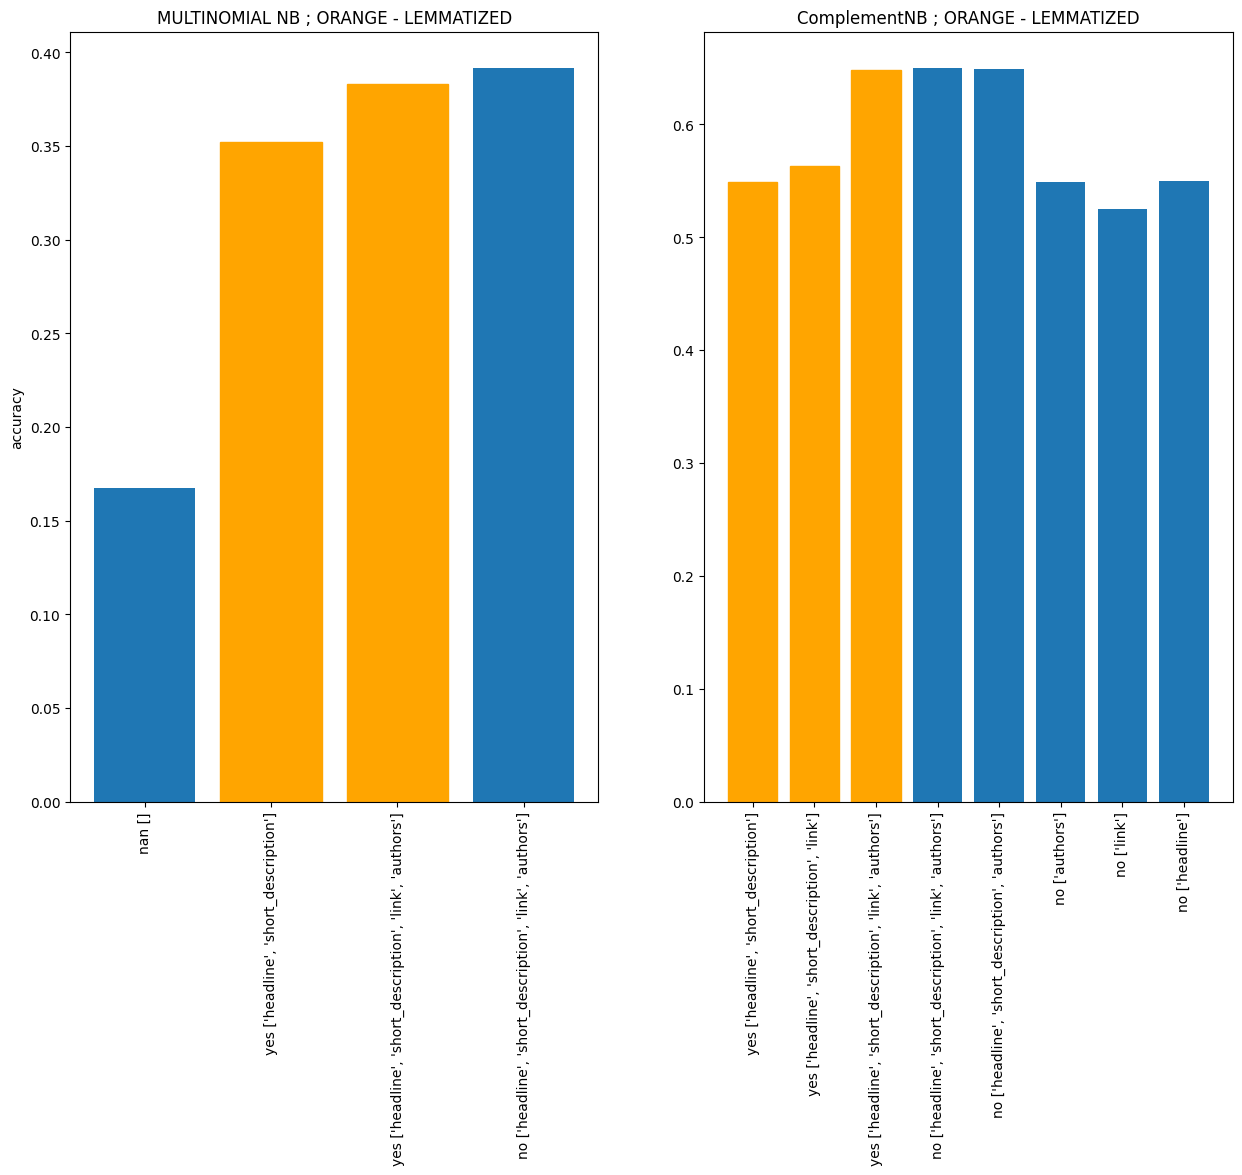

In [118]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
NB_data_multi = NB_data[ NB_data['model'] =='naive_bayes.MultinomialNB']
bars1 = ax[0].bar(NB_data_multi['lemmatized'] + ' ' + NB_data_multi['features'].astype(str),NB_data_multi['accuracy'])

for idx in range(len(bars1)):
    #print(NB_data_multi['lemmatized'].iloc[idx])
    if NB_data_multi['lemmatized'].iloc[idx] == 'yes':
        bars1[idx].set_color('orange')

ax[0].tick_params(axis='x', rotation=90)
NB_data_compl = NB_data[ NB_data['model'] =='naive_bayes.ComplementNB']
bars2 = ax[1].bar(NB_data_compl['lemmatized'] + ' ' + NB_data_compl['features'].astype(str),NB_data_compl['accuracy'])

for idx in range(len(bars2)):
    #print(NB_data_multi['lemmatized'].iloc[idx])
    if NB_data_compl['lemmatized'].iloc[idx] == 'yes':
        bars2[idx].set_color('orange')

ax[1].tick_params(axis='x', rotation=90)

ax[0].set_title('MULTINOMIAL NB ; ORANGE - LEMMATIZED')
ax[1].set_title('ComplementNB ; ORANGE - LEMMATIZED')
ax[0].set_ylabel('accuracy')

We can see that ComplementNB wirks much better


Best results when all features included

Lemmatization doesnt help


Lemmatized == nan means that glove vectors where used as features

In this case predictions are almost random

In [77]:
lstm_data.head()

,model,accuracy,model_params,opt_params,run_number,epoch,validation_or_train,additional_info,Pretrained
0,LSTMForClassificatoin,0.0000,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,not pretrained ; not frozen,not
1,LSTMForClassificatoin,0.1562,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,not pretrained ; not frozen,not
2,LSTMForClassificatoin,0.0312,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,not pretrained ; not frozen,not
3,LSTMForClassificatoin,0.2188,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,not pretrained ; not frozen,not
4,LSTMForClassificatoin,0.2188,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,not pretrained ; not frozen,not


In [78]:
def unique_dicts(df, column):
   
    return list({frozenset(d.items()): d for d in df[column] if isinstance(d, dict)}.values())

In [79]:
unique_dicts ( lstm_data, 'model_params')

[{'vocab_size': 30522,
  'emb_dim': 768,
  'hidden_size_lstm': 256,
  'num_layers': 1,
  'hiddem_size_MLP': 1024,
  'num_classes': 42},
 {'vocab_size': 30522,
  'emb_dim': 768,
  'hidden_size_lstm': 256,
  'num_layers': 1,
  'hiddem_size_MLP': 1024,
  'num_classes': 42,
  'bidirectional': True},
 {'vocab_size': 30522,
  'emb_dim': 768,
  'hidden_size_lstm': 256,
  'num_layers': 3,
  'hiddem_size_MLP': 1024,
  'num_classes': 42,
  'bidirectional': True},
 {'vocab_size': 400002,
  'emb_dim': 50,
  'hidden_size_lstm': 256,
  'num_layers': 3,
  'hiddem_size_MLP': 1024,
  'num_classes': 42,
  'bidirectional': True}]

In [80]:
lstm_data.Pretrained.unique()

array(['not', 'bert embeddings', 'glove'], dtype=object)

In [81]:
unique_dicts ( lstm_data, 'opt_params')

[{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1},
 {'lr': 0.00035, 'step_size': 10, 'gamma': 0.1},
 {'lr': 0.00035, 'step_size': 1, 'gamma': 0.1}]

In [82]:
lstm_not_pretrained = lstm_data[ lstm_data['Pretrained'] == 'not' ]
lstm_not_pretrained_val = lstm_not_pretrained [lstm_not_pretrained.validation_or_train == 'validation']

Text(0.5, 1.0, 'not pretrained embeddings')

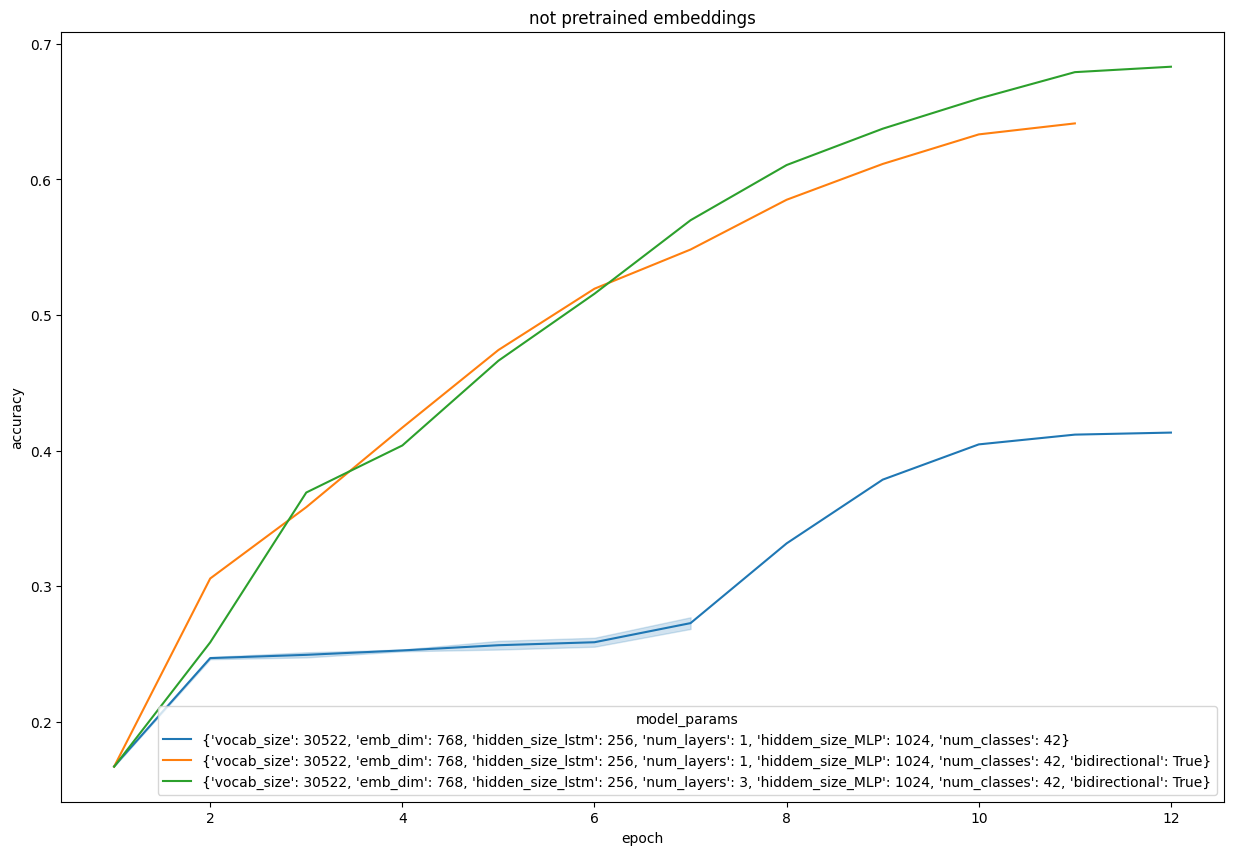

In [83]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(lstm_not_pretrained_val, x='epoch', y='accuracy', hue=lstm_not_pretrained_val.model_params.astype(str),ax=ax)
plt.title('not pretrained embeddings')

In [84]:
lstm_bert_pretrained = lstm_data[ lstm_data['Pretrained'] == 'bert embeddings' ]
lstm_bert_pretrained_val = lstm_bert_pretrained [lstm_bert_pretrained.validation_or_train == 'validation']

Text(0.5, 1.0, 'BERT-base-uncased embeddings')

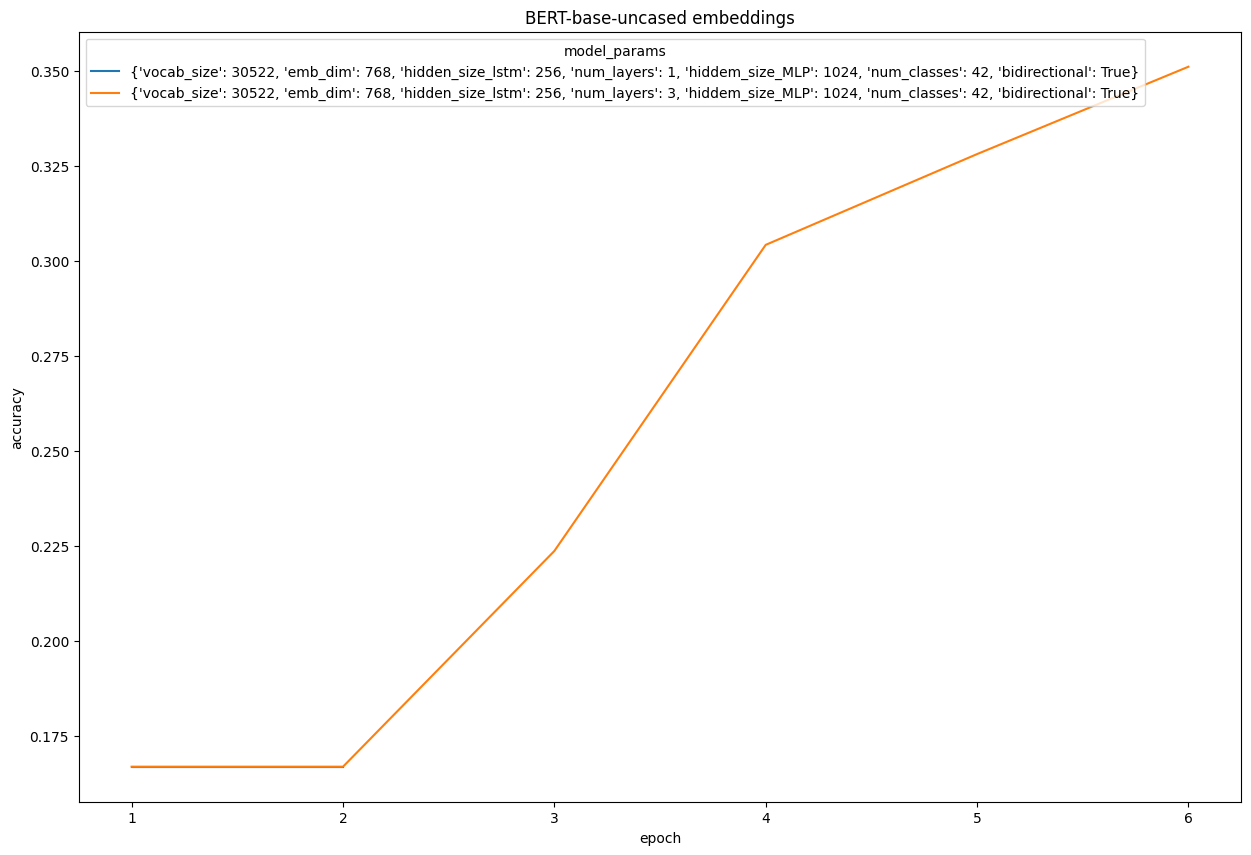

In [85]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(lstm_bert_pretrained_val, x='epoch', y='accuracy', hue=lstm_bert_pretrained_val.model_params.astype(str), ax=ax)
plt.title('BERT-base-uncased embeddings')

In [86]:
lstm_glove_pretrained = lstm_data[ lstm_data['Pretrained'] == 'glove' ]
lstm_glove_pretrained_val = lstm_glove_pretrained [lstm_glove_pretrained.validation_or_train == 'validation']

Text(0.5, 1.0, 'glove embeddings')

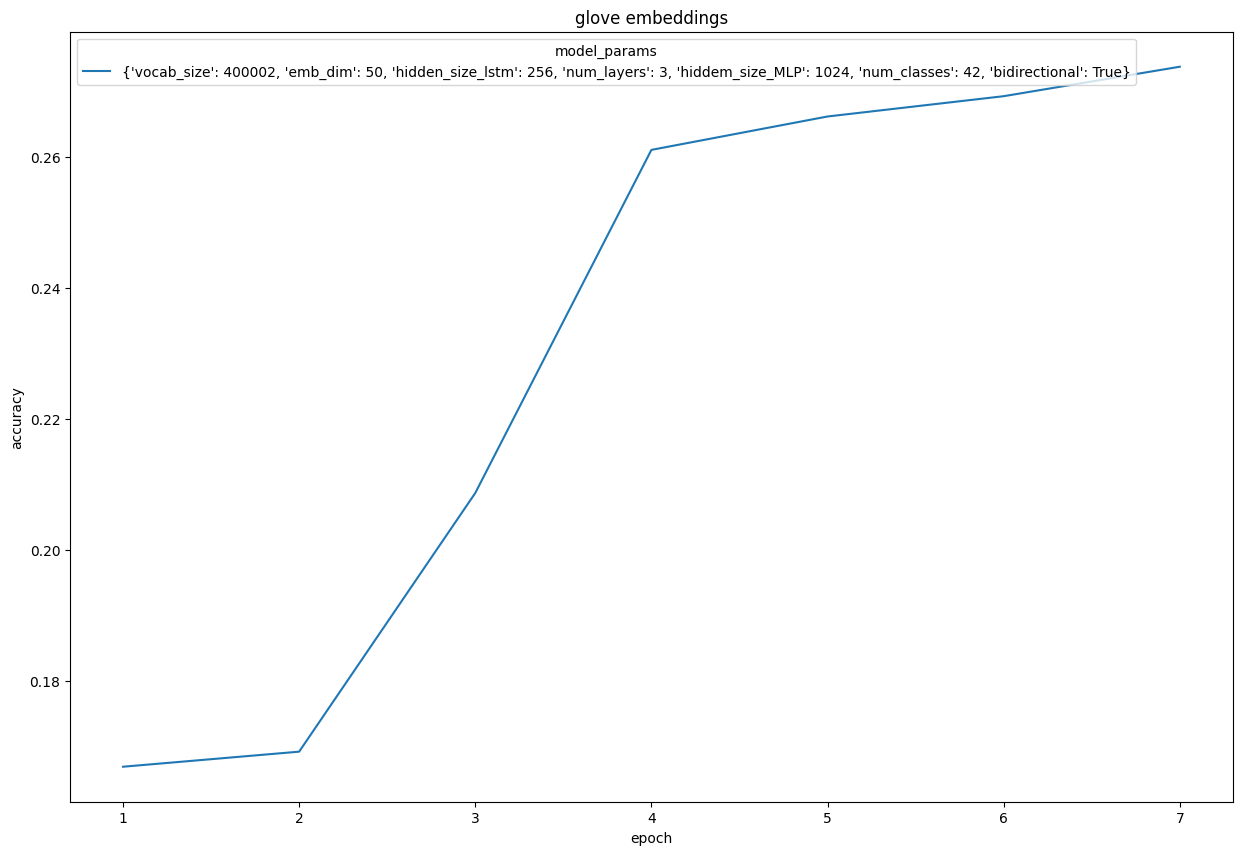

In [87]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(lstm_glove_pretrained_val, x='epoch', y='accuracy', hue=lstm_glove_pretrained_val.model_params.astype(str), ax=ax)
plt.title('glove embeddings')

For LSTM we can conclude that the best model is biderictional with 3 layers and not pretrained on anything

Bert pretrained embeddings(dim=768) perform better than glove(dim=50)

In [88]:
bert_data.head()

,model,accuracy,model_params,opt_params,run_number,epoch,validation_or_train,additional_info,Pretrained,Learnable
0,CustomBertForClassification,0.0000,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,pretrained bert-base-uncased ; only head learn...,bert-base-uncased,head
1,CustomBertForClassification,0.0938,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,pretrained bert-base-uncased ; only head learn...,bert-base-uncased,head
2,CustomBertForClassification,0.1562,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,pretrained bert-base-uncased ; only head learn...,bert-base-uncased,head
3,CustomBertForClassification,0.1562,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,pretrained bert-base-uncased ; only head learn...,bert-base-uncased,head
4,CustomBertForClassification,0.2188,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len...","{'lr': 0.00035, 'step_size': 5, 'gamma': 0.1}",1.0,1.0,train,pretrained bert-base-uncased ; only head learn...,bert-base-uncased,head


In [89]:
bert_data.Learnable.unique()

array(['head', 'all'], dtype=object)

In [90]:
unique_dicts(bert_data, column='model_params')

[{'model_dim': 768,
  'n_heads': 12,
  'max_seq_len': 512,
  'n_blocks': 12,
  'MLP_hidden': 1024},
 {'model_dim': 768,
  'n_heads': 12,
  'max_seq_len': 512,
  'n_blocks': 6,
  'MLP_hidden': 1024}]

In [91]:
bert_data.Pretrained.unique()

array(['bert-base-uncased', 'not'], dtype=object)

In [92]:
bert_data.additional_info.unique()

array(['pretrained bert-base-uncased ; only head learnable',
       'not pretrained ; all learnable',
       'bert-base-uncased finetning ; not frozen'], dtype=object)

In [93]:
bert_data_head = bert_data [bert_data.Learnable=='head']
bert_data_all = bert_data [bert_data.Learnable=='all']

In [95]:
bert_data_head_val = bert_data_head[bert_data_head['validation_or_train'] =='validation']
bert_data_all_val = bert_data_all[bert_data_all['validation_or_train'] =='validation']

Text(0.5, 1.0, 'only head learnable')

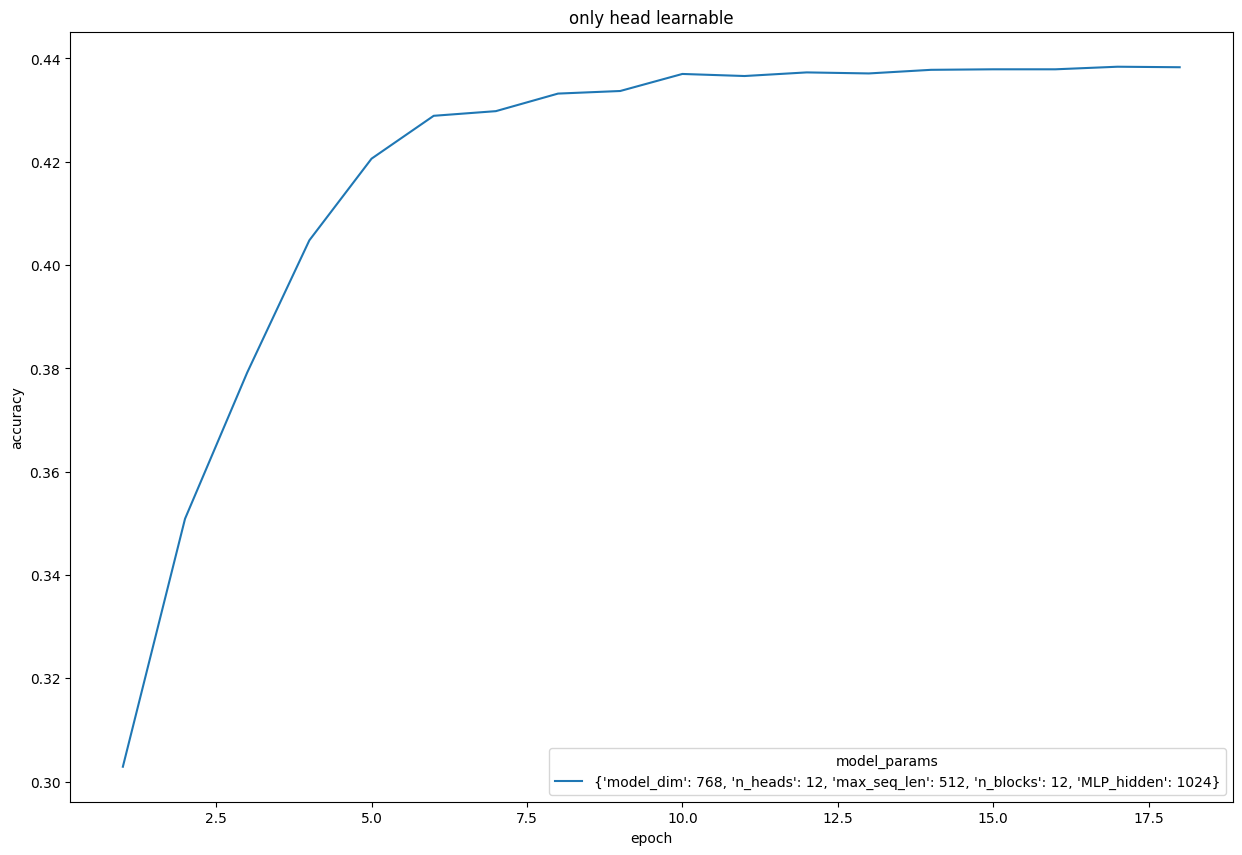

In [97]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(bert_data_head_val, x='epoch', y='accuracy', hue=bert_data_head_val.model_params.astype(str), ax=ax)
plt.title('only head learnable')

Text(0.5, 1.0, 'Bert all learnable')

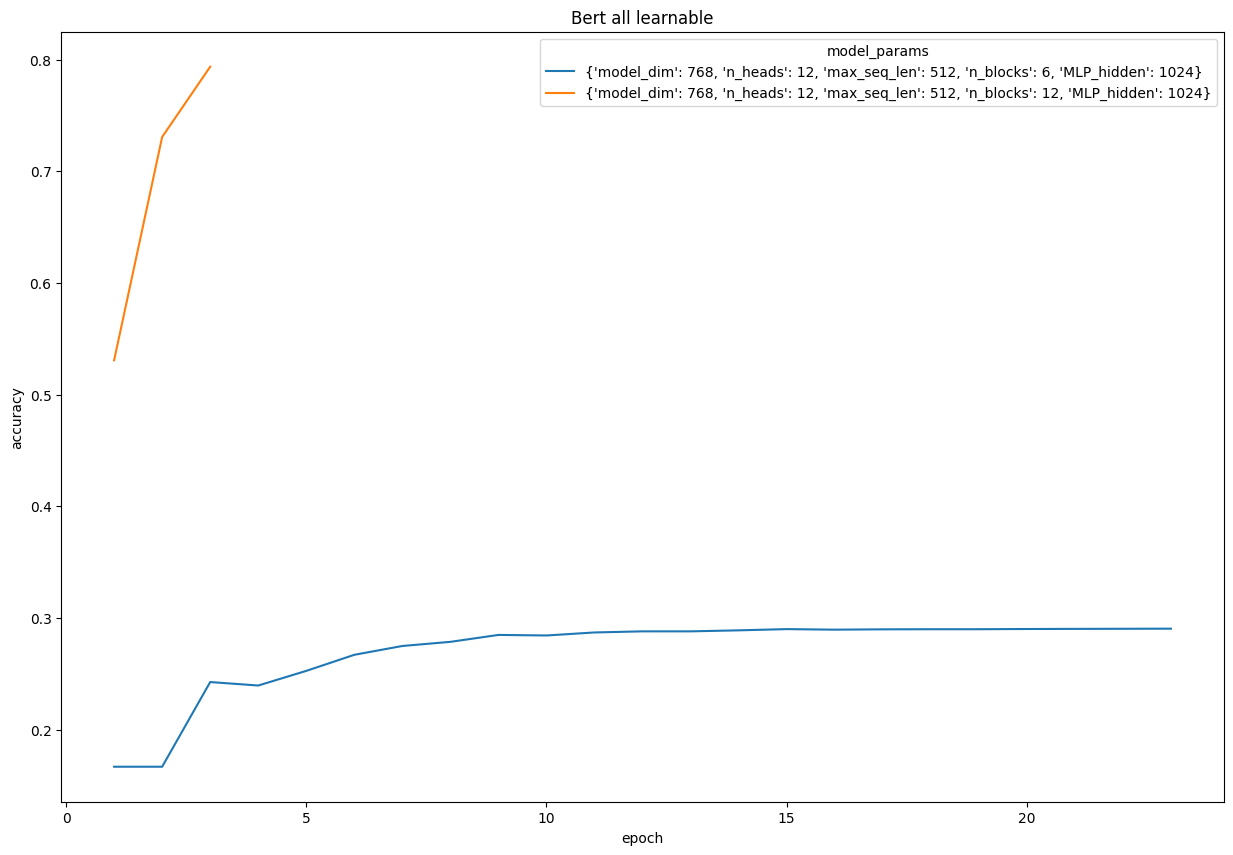

In [99]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(bert_data_all_val, x='epoch', y='accuracy', hue=bert_data_all_val.model_params.astype(str), ax=ax)
plt.title('Bert all learnable')

Orange line - bert-base-uncased initialized

Blue line - training from scratch

Below are some general notes

In [101]:
cleaned_val = cleaned[cleaned.validation_or_train=='validation']

In [111]:
cleaned_val_formatted = cleaned_val
cleaned_val_formatted.model_params = cleaned_val_formatted.model_params .astype(str)

/tmp/ipykernel_209736/4226759077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_val_formatted.model_params = cleaned_val_formatted.model_params .astype(str)


In [112]:
cleaned_val_formatted = cleaned_val_formatted.groupby(['model', 'model_params','validation_or_train','additional_info']).agg({'accuracy':'max'}).reset_index()

In [114]:
pd.set_option('display.max_colwidth', None)  # Disable truncation for columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable line wrapping


In [116]:
cleaned_val_formatted.sort_values(by='accuracy', ascending=False).head(20).drop(['validation_or_train'],axis=1)

,model,model_params,additional_info,accuracy
0,CustomBertForClassification,"{'model_dim': 768, 'n_heads': 12, 'max_seq_len': 512, 'n_blocks': 12, 'MLP_hidden': 1024}",bert-base-uncased finetning ; not frozen,0.793600
7,LSTMForClassificatoin,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_size_lstm': 256, 'num_layers': 3, 'hiddem_size_MLP': 1024, 'num_classes': 42, 'bidirectional': True}",not pretrained ; not frozen,0.683100
12,naive_bayes.ComplementNB,nan,no lemmatizationfeatures: headline short_description link authors,0.649740
11,naive_bayes.ComplementNB,nan,no lemmatizationfeatures: headline short_description authors,0.649167
16,naive_bayes.ComplementNB,nan,with lemmatizationfeatures: headline short_description link authors,0.648404
4,LSTMForClassificatoin,"{'vocab_size': 30522, 'emb_dim': 768, 'hidden_size_lstm': 256, 'num_layers': 1, 'hiddem_size_MLP': 1024, 'num_classes': 42, 'bidirectional': True}",not pretrained ; not frozen,0.641300
15,naive_bayes.ComplementNB,nan,with lemmatizationfeatures: headline short_description link,0.562712
10,naive_bayes.ComplementNB,nan,no lemmatizationfeatures: headline,0.549635
9,naive_bayes.ComplementNB,nan,no lemmatizationfeatures: authors,0.548824
14,naive_bayes.ComplementNB,nan,with lemmatizationfeatures: headline short_description,0.548680


We can see that:

- Bert initializaed with bert-base-uncased and with all learnable weights outperforms all other methods
- Bert initializaed with bert-base-uncased and only head learnable perfomrs bad
- bidirectional LSTM performs quite good when training from scratch
- Naive bayes performs a bit worse than BiLSTM (best when all features included)